In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

# Exploratory Data Analysis (EDA)

In [13]:
data = pd.read_csv("AmesHousing.csv")

In [14]:
data.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [15]:
data.tail(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000
2929,2930,924151050,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,188000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [17]:
data.dtypes

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object

In [18]:
data.describe(include='O')

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
count,2930,2930,198,2930,2930,2930,2930,2930,2930,2930,...,2773,2771,2771,2771,2930,13,572,106,2930,2930
unique,7,2,2,4,4,3,5,3,28,9,...,6,3,5,5,3,4,4,5,10,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2273,2918,120,1859,2633,2927,2140,2789,443,2522,...,1731,1231,2615,2665,2652,4,330,95,2536,2413


In [19]:
data['PID'].duplicated().value_counts()  # Property identification number

False    2930
Name: PID, dtype: int64

In [20]:
print(data.isnull().sum())

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64


In [21]:
print(data.shape)

(2930, 82)


In [22]:
data["Sale Condition"].unique()

array(['Normal', 'Partial', 'Family', 'Abnorml', 'Alloca', 'AdjLand'],
      dtype=object)

In [23]:
data["Neighborhood"].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

In [24]:
(data["Neighborhood"] == "NAmes").value_counts()

False    2487
True      443
Name: Neighborhood, dtype: int64

In [25]:
# data = data.drop(data[data["Neighborhood"]=="NAmes"].index)

In [26]:
data.shape

(2930, 82)

In [27]:
data["House Style"].unique()

array(['1Story', '2Story', '1.5Fin', 'SFoyer', 'SLvl', '2.5Unf', '1.5Unf',
       '2.5Fin'], dtype=object)

In [28]:
data["Sale Condition"].unique()

array(['Normal', 'Partial', 'Family', 'Abnorml', 'Alloca', 'AdjLand'],
      dtype=object)

In [29]:
data["Year Built"].unique()

array([1960, 1961, 1958, 1968, 1997, 1998, 2001, 1992, 1995, 1999, 1993,
       1990, 1985, 2003, 1988, 2010, 1951, 1978, 1977, 1974, 2000, 1970,
       1971, 1975, 2009, 2007, 2005, 2004, 2002, 2006, 1996, 1994, 2008,
       1980, 1979, 1984, 1920, 1965, 1967, 1963, 1962, 1976, 1972, 1966,
       1959, 1964, 1950, 1952, 1949, 1940, 1954, 1955, 1957, 1956, 1953,
       1948, 1900, 1910, 1927, 1915, 1945, 1929, 1938, 1923, 1928, 1890,
       1885, 1922, 1925, 1939, 1942, 1936, 1930, 1921, 1912, 1917, 1907,
       1875, 1969, 1947, 1946, 1987, 1941, 1924, 1914, 1931, 1919, 1989,
       1896, 1973, 1991, 1981, 1986, 1916, 1926, 1935, 1892, 1898, 1880,
       1882, 1937, 1902, 1934, 1982, 1983, 1932, 1918, 1904, 1905, 1872,
       1893, 1906, 1908, 1911, 1895, 1879, 1901, 1913], dtype=int64)

In [30]:
data["Yr Sold"].unique()

array([2010, 2009, 2008, 2007, 2006], dtype=int64)

In [31]:
data["SalePrice"].isnull().value_counts()

False    2930
Name: SalePrice, dtype: int64

In [32]:
data["SalePrice"].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [62]:
prices = data[
    ["PID", "Neighborhood", "Lot Area", "House Style", "Sale Condition", "Year Built", "Yr Sold", "SalePrice"]]
prices

,PID,Neighborhood,Lot Area,House Style,Sale Condition,Year Built,Yr Sold,SalePrice
0,526301100,NAmes,31770,1Story,Normal,1960,2010,215000
1,526350040,NAmes,11622,1Story,Normal,1961,2010,105000
2,526351010,NAmes,14267,1Story,Normal,1958,2010,172000
3,526353030,NAmes,11160,1Story,Normal,1968,2010,244000
4,527105010,Gilbert,13830,2Story,Normal,1997,2010,189900
...,...,...,...,...,...,...,...,...
2925,923275080,Mitchel,7937,SLvl,Normal,1984,2006,142500
2926,923276100,Mitchel,8885,1Story,Normal,1983,2006,131000
2927,923400125,Mitchel,10441,SFoyer,Normal,1992,2006,132000
2928,924100070,Mitchel,10010,1Story,Normal,1974,2006,170000


C:\Users\USER\AppData\Local\Temp\ipykernel_11468\2483684661.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = prices.corr()


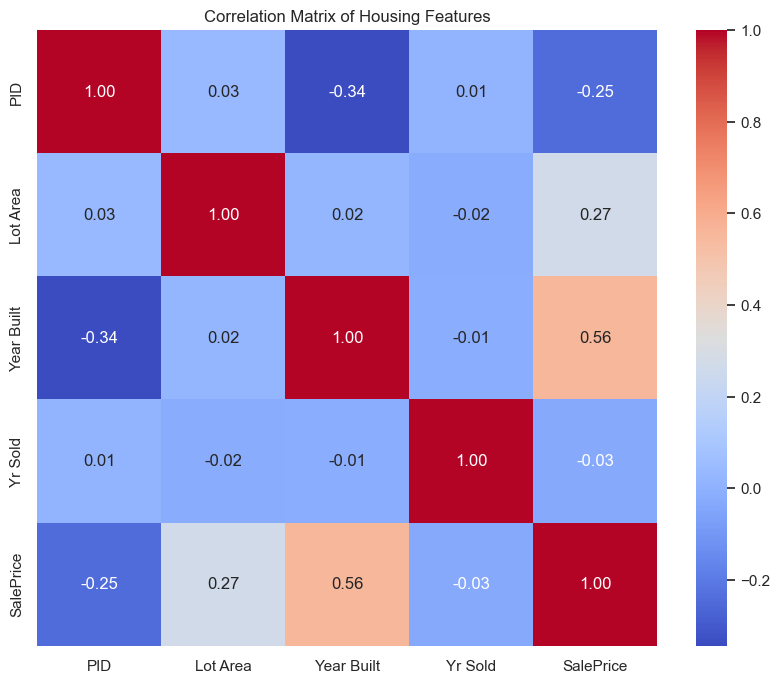

In [70]:
corr_matrix = prices.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Housing Features")
plt.show()

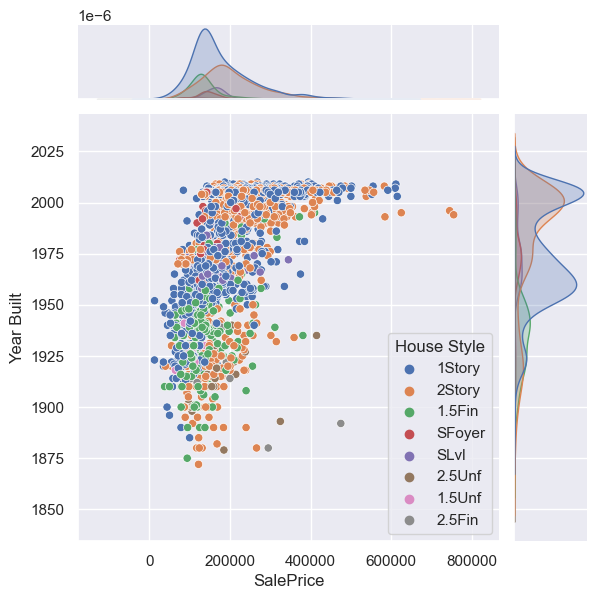

In [73]:
sns.jointplot(data=prices, x="SalePrice", y="Year Built", hue="House Style")

In [42]:
# sns.jointplot(data=pricesByNBHD, x="SalePrice", y="Yr Sold")

In [63]:
pricesByNBHD = prices[["Neighborhood", "Lot Area", "SalePrice"]].groupby(["Neighborhood"]).mean().reset_index()
pricesByNBHD

,Neighborhood,Lot Area,SalePrice
0,Blmngtn,3399.357143,196661.678571
1,Blueste,2346.500000,143590.000000
2,BrDale,1840.633333,105608.333333
3,BrkSide,6959.777778,124756.250000
4,ClearCr,24842.250000,208662.090909
5,CollgCr,9999.752809,201803.434457
6,Crawfor,11650.106796,207550.834951
7,Edwards,10355.536082,130843.381443
8,Gilbert,11342.369697,190646.575758
9,Greens,3884.000000,193531.250000


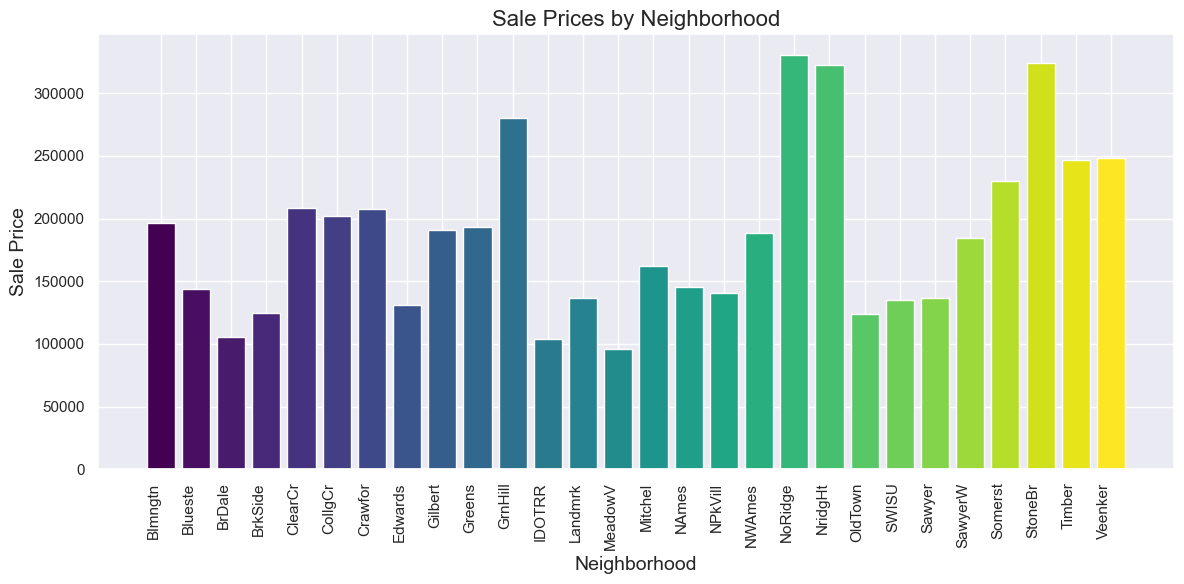

In [61]:
colors = plt.cm.viridis(np.linspace(0, 1, len(pricesByNBHD["Neighborhood"])))

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(pricesByNBHD["Neighborhood"], pricesByNBHD["SalePrice"], color=colors)
plt.xticks(rotation=90, ha='right')
ax.set_title("Sale Prices by Neighborhood", fontsize=16)
ax.set_xlabel("Neighborhood", fontsize=14)
ax.set_ylabel("Sale Price", fontsize=14)

plt.tight_layout()
plt.show()

In [66]:
pricesInNoRidge = prices.drop(prices[prices["Neighborhood"]!="NoRidge"].index)
pricesInNoRidge

,PID,Neighborhood,Lot Area,House Style,Sale Condition,Year Built,Yr Sold,SalePrice
59,528328100,NoRidge,14774,2Story,Normal,1999,2010,333168
60,528344070,NoRidge,17433,2Story,Normal,1998,2010,355000
61,528358010,NoRidge,10593,1Story,Normal,1996,2010,260400
62,528363130,NoRidge,12256,2Story,Normal,1994,2010,325000
63,528382020,NoRidge,11764,2Story,Normal,1999,2010,290000
...,...,...,...,...,...,...,...,...
2499,533110130,NoRidge,16059,2Story,Normal,1991,2006,260000
2500,533125120,NoRidge,11025,2Story,Normal,1992,2006,334000
2501,533127080,NoRidge,14541,2Story,Abnorml,1993,2006,310000
2502,533128030,NoRidge,13346,2Story,Normal,1992,2006,268000


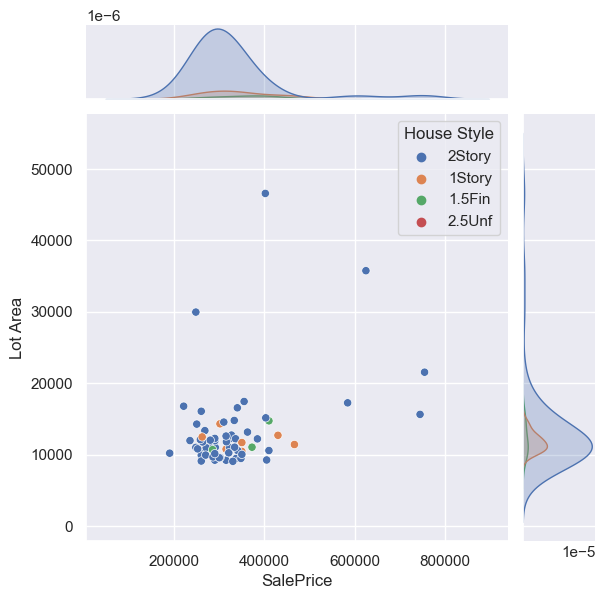

In [68]:
sns.jointplot(data=pricesInNoRidge, x="SalePrice", y="Lot Area", hue="House Style")

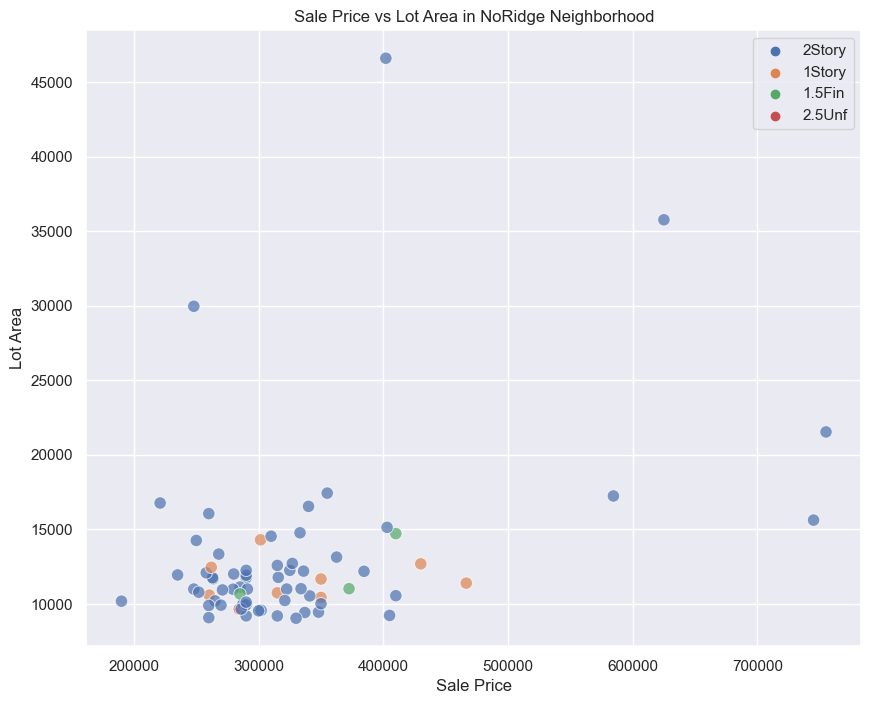

In [69]:
# Increase figure size
plt.figure(figsize=(10, 8))

# Adjust marker size and transparency
sns.scatterplot(data=pricesInNoRidge, x="SalePrice", y="Lot Area", hue="House Style", s=80, alpha=0.7)

# Add titles and labels
plt.title("Sale Price vs Lot Area in NoRidge Neighborhood")
plt.xlabel("Sale Price")
plt.ylabel("Lot Area")

# Improve legend placement
plt.legend(loc='upper right')

plt.show()

In [72]:
pricesInNoRidge["SalePrice"].describe()

count        71.000000
mean     330319.126761
std      101444.662927
min      190000.000000
25%      270395.000000
50%      302000.000000
75%      349000.000000
max      755000.000000
Name: SalePrice, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2f718497890>,
 'caps': [<matplotlib.lines.Line2D at 0x2f71850c5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f7184fe810>],
 'medians': [<matplotlib.lines.Line2D at 0x2f71850d590>],
 'fliers': [<matplotlib.lines.Line2D at 0x2f7184cee90>],
 'means': []}

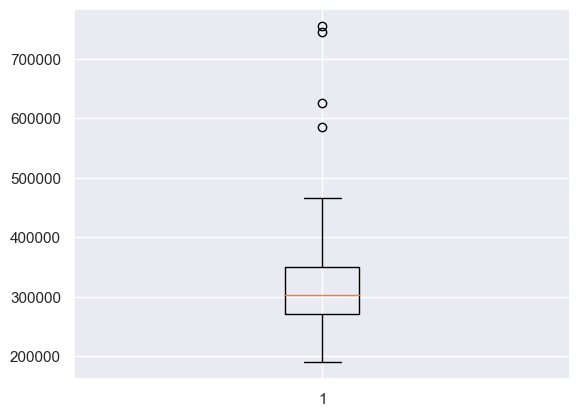

In [71]:
plt.boxplot(pricesInNoRidge["SalePrice"])